# Alpha Vantage API

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
key = open('1-alphavantage.txt').read()
from alpha_vantage.sectorperformance import SectorPerformances

In [2]:
sp = SectorPerformances(key, output_format='pandas')
data, meta_data = sp.get_sector()

In [ ]:
meta_data

In [ ]:
data.head()

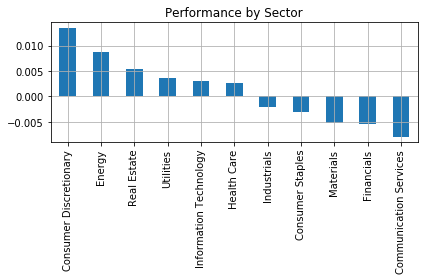

In [36]:
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title("Performance by Sector")
plt.tight_layout()
plt.grid(True)

In [37]:
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.timeseries import TimeSeries

In [63]:
ta = TechIndicators(key, output_format='pandas')

In [65]:
goog, meta = ta.get_sma('GOOG', interval='daily', time_period=200, series_type='close')

In [ ]:
goog.head()

In [ ]:
plt.plot(goog)

In [68]:
ts = TimeSeries(key, output_format='pandas')

In [69]:
prices,meta = ts.get_daily('GOOG', outputsize='full')

In [70]:
prices.columns = ['open','high','low','close','volume']
prices.sort_index(inplace=True)
prices.head()

,open,high,low,close,volume
date,,,,,
2014-03-27,568.000,568.00,552.92,558.46,13100.0
2014-03-28,561.200,566.43,558.67,559.99,41100.0
2014-03-31,566.890,567.00,556.93,556.97,10800.0
2014-04-01,558.710,568.45,558.71,567.16,7900.0
2014-04-02,565.106,604.83,562.19,567.00,146700.0


In [71]:
prices = prices.loc['2015-01-09':]

In [ ]:
plt.plot(prices['close'])
plt.plot(goog)

#### https://www.alphavantage.co/documentation/

In [73]:
import requests
import json

In [74]:
symbol = 'GOOG'

call = requests.get(f'https://www.alphavantage.co/query?function=OVERVIEW&symbol={symbol}&apikey={key}').text

In [75]:
call = json.loads(call)
call = pd.DataFrame.from_dict(call, orient='index')

In [79]:
call.loc['Symbol']

0    GOOG
Name: Symbol, dtype: object

#### Other API function calls: BALANCE_SHEET INCOME_STATEMENT  CASH_FLOW EARNINGS

In [80]:
symbol = 'GOOG'
function = 'EARNINGS'
call = requests.get(f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey={key}").text

In [ ]:
call = json.loads(call)
call

In [ ]:
pd.DataFrame(call['quarterlyEarnings'])